In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC

In [2]:
def generate_binary_dataset(min_value, max_value, size, positive_condition):
    data = pd.DataFrame(
        np.concatenate((
            np.random.uniform(min_value, max_value, (size, 2)),
            -np.ones((size, 1))), axis=1), 
        columns=['x', 'y', 'target'])
    data.target[positive_condition(data.x, data.y)] = 1
    return data

In [3]:
def plot_separator(svc):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svc.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s=100, linewidth=1, label="support vectors", facecolors='none', edgecolors='k')

In [4]:
def plot_binary(data, svc=None):
    plt.figure(figsize=(10, 10))
    plt.scatter(data.x, data.y, c=data.target, label="data", s=30, cmap=plt.cm.Paired)
    
    if svc:
        plot_separator(svc)
    
    plt.grid()
    plt.legend()

In [202]:
dataset = generate_binary_dataset(-4, 4, 500, lambda x, y: x - y > 1)
dataset.head()

,x,y,target
0,1.491130,-0.689898,1.0
1,1.725212,-2.032159,1.0
2,0.003062,2.410035,-1.0
3,-1.010260,-3.207248,1.0
4,-3.897887,1.220879,-1.0


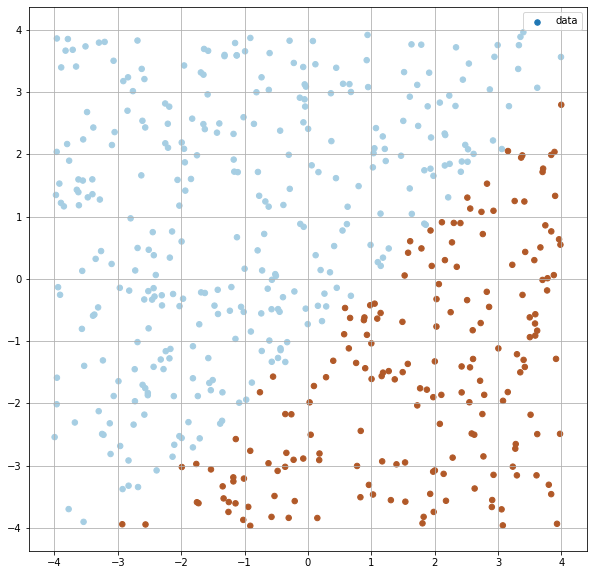

In [203]:
plot_binary(dataset)

In [204]:
model = SVC(kernel="linear")

In [205]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

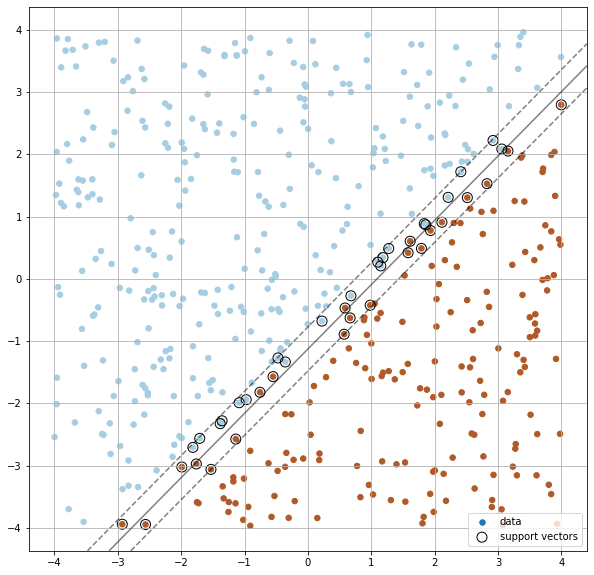

In [206]:
plot_binary(dataset, model)

In [207]:
dataset = generate_binary_dataset(-2, 2, 500, lambda x, y: x ** 2 + y ** 2 < 1)
dataset.head()

,x,y,target
0,-1.413031,-1.443351,-1.0
1,-0.756581,-1.285474,-1.0
2,1.410844,-0.189126,-1.0
3,1.276556,0.815217,-1.0
4,1.122074,1.378932,-1.0


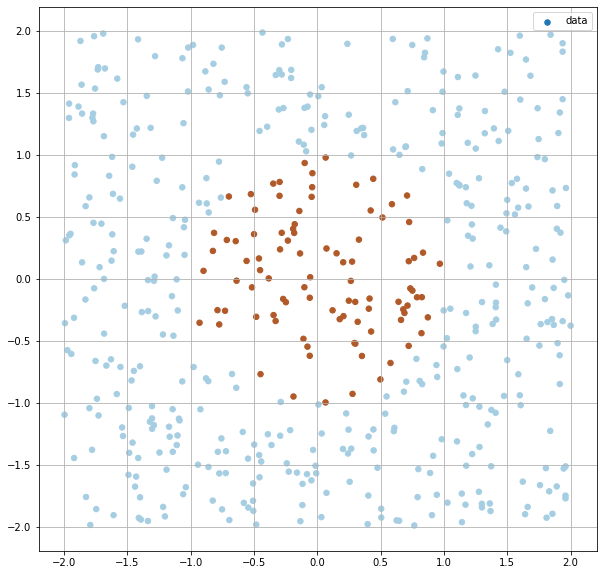

In [208]:
plot_binary(dataset)

In [209]:
model = SVC(kernel='rbf')

In [210]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

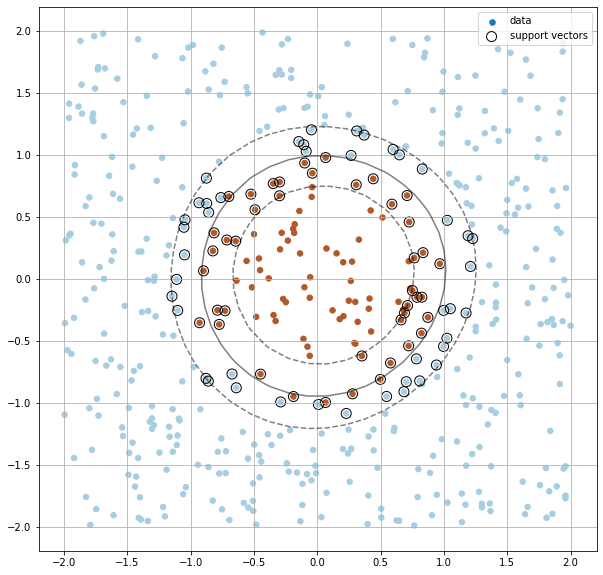

In [211]:
plot_binary(dataset, model)

In [232]:
dataset = generate_binary_dataset(-3, 3, 500, lambda x, y: x ** 2 - y ** 2 < 1)
dataset.head()

,x,y,target
0,2.833982,2.754517,1.0
1,-0.969354,-0.765489,1.0
2,-1.862836,2.453536,1.0
3,-0.688466,1.213863,1.0
4,0.109335,0.674836,1.0


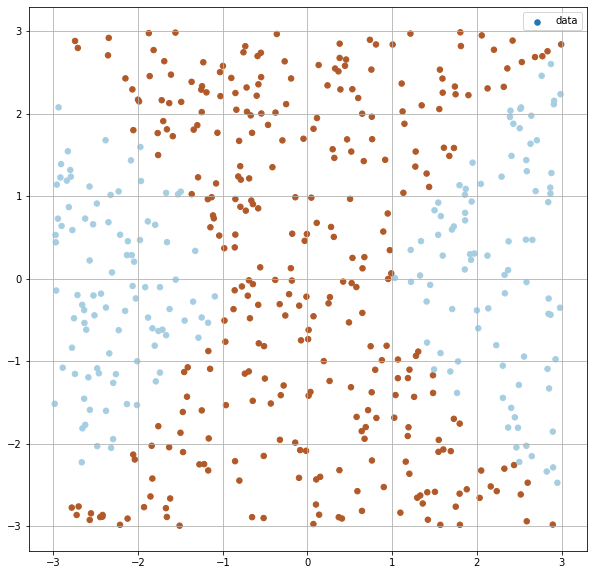

In [233]:
plot_binary(dataset)

In [234]:
model = SVC(kernel='rbf')

In [235]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

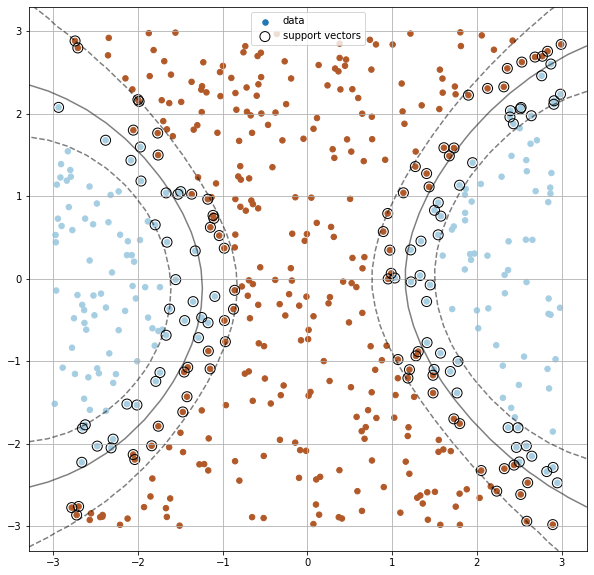

In [236]:
plot_binary(dataset, model)

In [266]:
dataset = generate_binary_dataset(-5, 5, 1000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 3))
dataset.head()

,x,y,target
0,-3.754811,0.391228,-1.0
1,-3.049008,-0.686398,-1.0
2,-2.467119,-0.264093,-1.0
3,4.812135,4.193919,-1.0
4,-0.775465,0.903261,-1.0


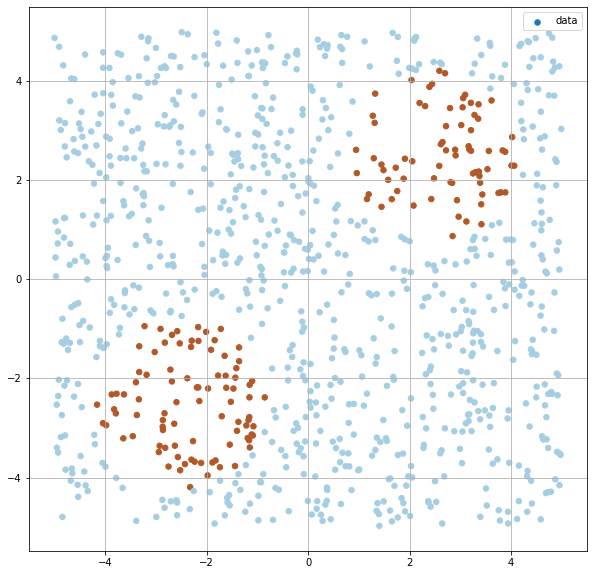

In [267]:
plot_binary(dataset)

In [268]:
model = SVC(kernel='rbf', tol=1e-11)

In [269]:
model.fit(dataset[['x', 'y']], dataset.target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-11, verbose=False)

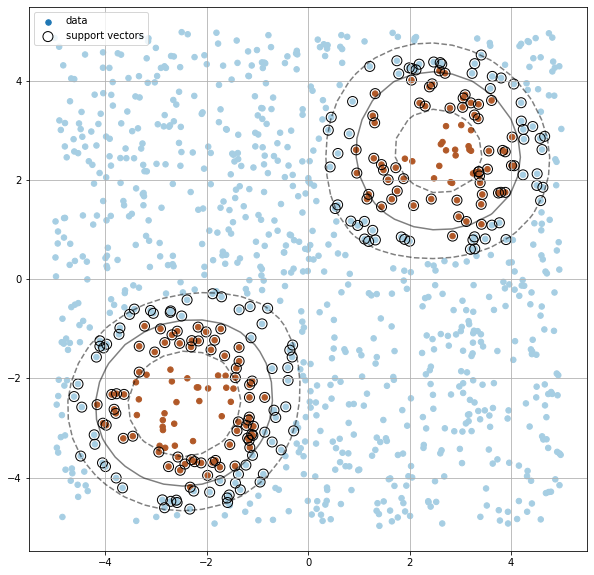

In [270]:
plot_binary(dataset, model)

In [46]:
dataset = generate_binary_dataset(-6, 6, 2000, lambda x, y: ((x - 2.5) ** 2 + (y - 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y + 2.5) ** 2 < 3) | ((x - 2.5) ** 2 + (y + 2.5) ** 2 < 3) | ((x + 2.5) ** 2 + (y - 2.5) ** 2 < 3))
dataset.head()

,x,y,target
0,3.119445,1.860806,1.0
1,1.938425,-1.154160,1.0
2,1.411397,-4.898135,-1.0
3,1.454612,2.059554,1.0
4,1.188875,0.713936,-1.0


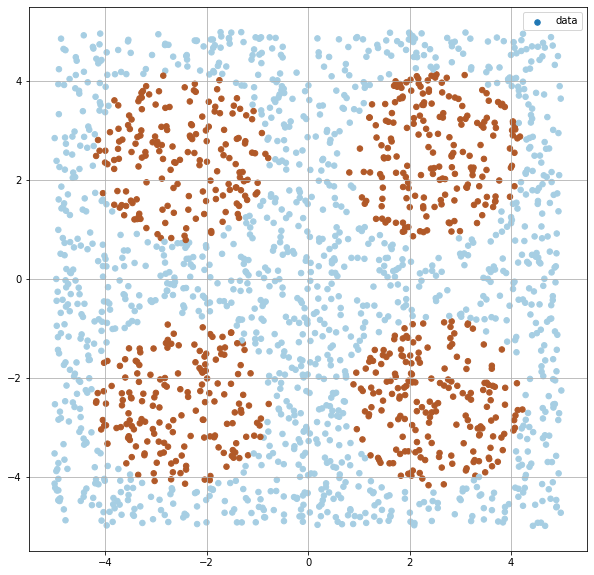

In [47]:
plot_binary(dataset)

In [48]:
model = SVC(kernel='rbf', tol=1e-12, verbose=True)

In [49]:
model.fit(dataset[['x', 'y']], dataset.target)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=1e-12, verbose=True)

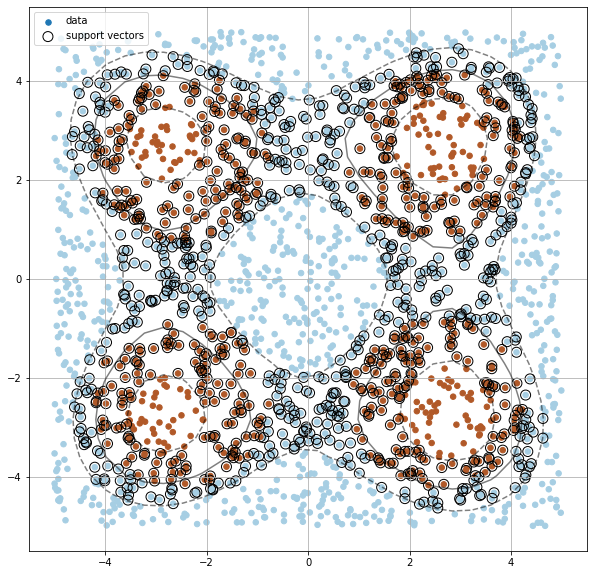

In [50]:
plot_binary(dataset, model)